# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

## Постоянные

In [2]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Функции ввода-вывода

### Функции работы с текстом

In [3]:
def get_2_shafts_parameters_note(extremal_value_df):
    pi = extremal_value_df.pi.values[0]
    eta = extremal_value_df.eta.values[0]
    power = extremal_value_df.N_e.values[0] / 1e6
    mass_rate = extremal_value_df.G.values[0]
    return Math(r'''
    \begin{align}
        \pi = %.1f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, eta, power, mass_rate))

### Функции работы с графиками

In [4]:
def plot_characteristic(power, y_arr, ylabel):
    plt.title('$Приведенная \ характеристика \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(power / power.max(), y_arr)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()

def plot_common_characteristics(data, y_min=0.8, y_max=1.02):
    plt.title('$Приведенные \ характеристики \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(data.power / data.power.max(), data.mass_rate / data.mass_rate.max())
#     plt.plot(data.pi, data.eta / data.eta.max())
    plt.ylim([y_min, y_max])
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()
    plt.legend(['$\overline{G}$', '$\overline{\eta}$'], loc='lower right')

## Загрузка данных 

In [5]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')
# data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

## Двухвальная установка без регенератора

### Загрузка данных

In [6]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')

In [7]:
data_2n

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,t
16,NaN,1.0,0.995663,45.140791,8.020366,2.569756,2.816089,9.781292,2546.126609,9474.047413,1240
15,NaN,1.0,0.996496,45.660893,8.147033,2.608320,2.818271,10.170393,2579.450338,9511.977429,1250
14,NaN,1.0,0.997216,46.173876,8.273096,2.646960,2.820102,10.562816,2612.208433,9549.054088,1260
13,NaN,1.0,0.997831,46.680337,8.398642,2.685694,2.821608,10.958293,2644.410651,9585.340389,1270
12,NaN,1.0,0.998349,47.180156,8.523633,2.724500,2.822813,11.356470,2676.059204,9620.844833,1280
11,NaN,1.0,0.998778,47.673697,8.648117,2.763379,2.823744,11.756938,2707.152169,9655.609848,1290
10,NaN,1.0,0.999126,48.161417,8.772163,2.802339,2.824426,12.159489,2737.703250,9689.682462,1300
9,NaN,1.0,0.999401,48.643403,8.895769,2.841364,2.824886,12.563701,2767.709207,9723.081837,1310
8,NaN,1.0,0.999612,49.120179,9.019021,2.880463,2.825149,12.969374,2797.183320,9755.856495,1320
7,NaN,1.0,0.999767,49.592119,9.141971,2.919634,2.825242,13.376219,2826.131634,9788.042993,1330


### Построим общие характеристики установки

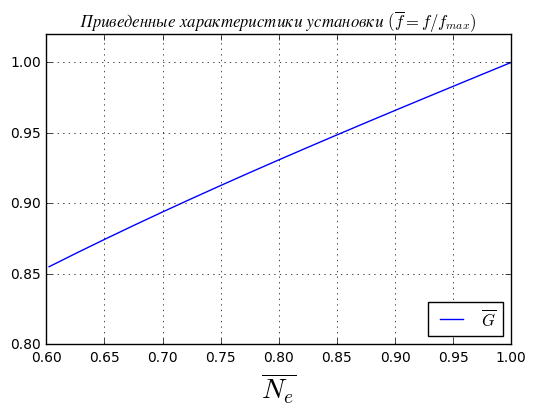

In [8]:
plot_common_characteristics(data_2n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

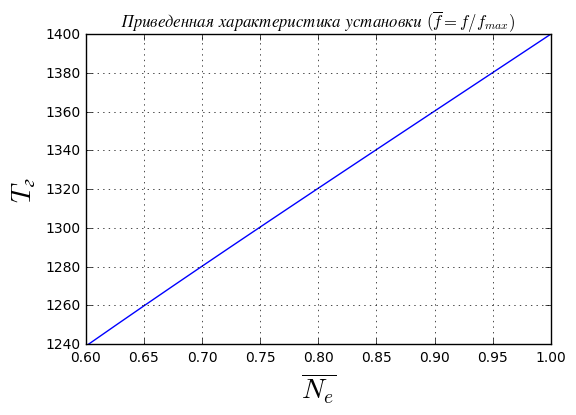

In [9]:
plot_characteristic(data_2n.power, data_2n.t, "$T_г$")
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [10]:
data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')

In [11]:
data_2nr

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,sigma,t
99,NaN,0.999999,0.990440,47.781352,6.533095,2.231302,2.407763,8.935555,2462.257736,9456.097517,0.861129,1252
98,NaN,0.999999,0.990710,47.891974,6.553822,2.237754,2.408438,9.012547,2469.309371,9464.710116,0.860242,1254
97,NaN,1.000000,0.990974,48.002218,6.574519,2.244206,2.409098,9.089713,2476.336839,9473.279872,0.859358,1256
96,NaN,1.000000,0.991233,48.112092,6.595188,2.250657,2.409745,9.167055,2483.340500,9481.807676,0.858477,1258
95,NaN,1.000000,0.991488,48.221581,6.615826,2.257106,2.410379,9.244565,2490.319975,9490.292555,0.857597,1260
94,NaN,1.000000,0.991737,48.330697,6.636434,2.263555,2.410998,9.322242,2497.275483,9498.735695,0.856720,1262
93,NaN,1.000000,0.991981,48.439446,6.657014,2.270004,2.411605,9.400088,2504.207456,9507.137681,0.855846,1264
92,NaN,1.000000,0.992221,48.547780,6.677559,2.276450,2.412198,9.478078,2511.113946,9515.495139,0.854974,1266
91,NaN,1.000000,0.992455,48.655747,6.698074,2.282894,2.412778,9.556228,2517.996684,9523.811871,0.854104,1268
90,NaN,1.000000,0.992685,48.763350,6.718561,2.289339,2.413345,9.634539,2524.856098,9532.088426,0.853237,1270


In [12]:
plt.plot(data_2nr.pi_c, data_2nr.t)
plt.grid()

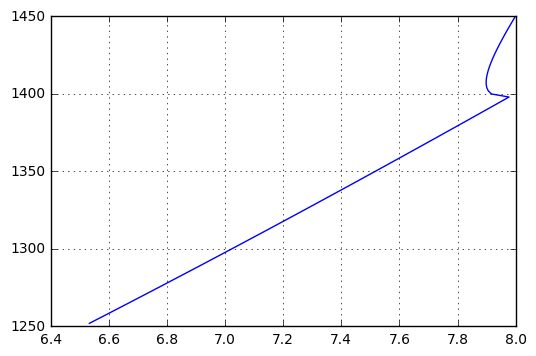

In [13]:
plt.show()

### Построим общие характеристики установки

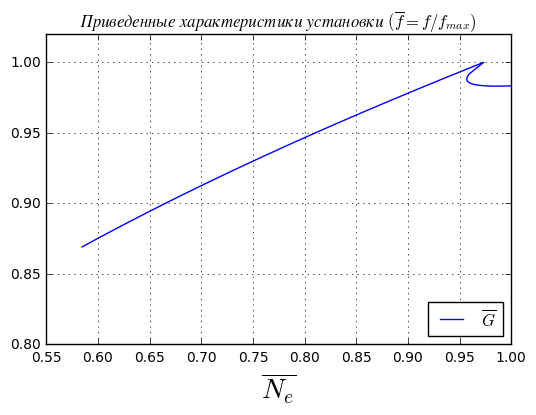

In [14]:
plot_common_characteristics(data_2nr)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

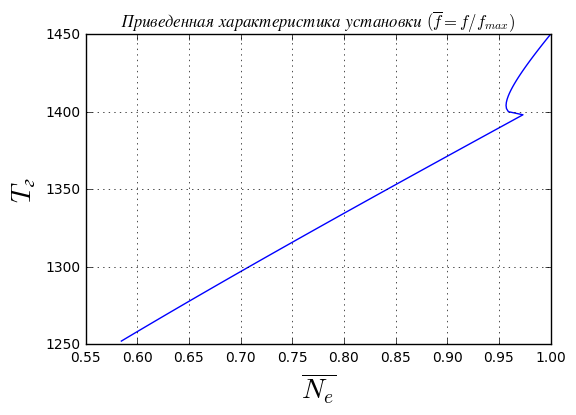

In [15]:
plot_characteristic(data_2nr.power, data_2nr.t, "$T_г$")
plt.show()

### Построим зависимость коэффициента восстановления от относительной мощности установки

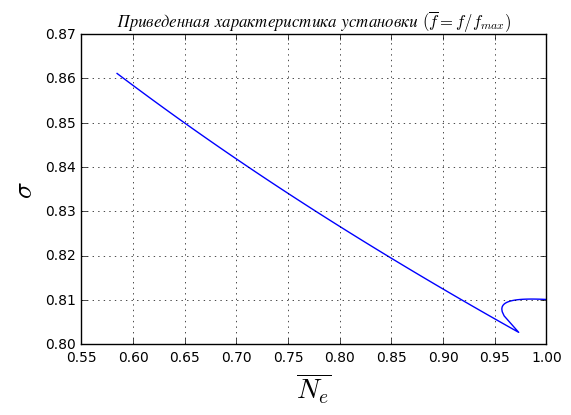

In [16]:
plot_characteristic(data_2nr.power, data_2nr.sigma, "$\sigma$")
plt.show()

## Трехвальная установка без пром. охлаждения, пром. подогрева и регенератора

### Загрузка данных

In [17]:
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

In [18]:
data_3n

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,NaN,0.977776,1.0,1.000483,42.818615,2.042418,2.090273,3.522088,6.703940,2157.183011,5479.113539,5465.630057,1290
15,NaN,0.979857,1.0,1.000524,43.355698,2.071924,2.096925,3.569411,7.027419,2191.480177,5494.871134,5495.449999,1300
14,NaN,0.981821,1.0,1.000564,43.891749,2.101705,2.103597,3.616629,7.358970,2225.563768,5510.514248,5524.897859,1310
13,NaN,0.983670,1.0,1.000605,44.426943,2.131775,2.110287,3.663755,7.698611,2259.439535,5526.051579,5554.002703,1320
12,NaN,0.985406,1.0,1.000644,44.961189,2.162136,2.116996,3.710781,8.046226,2293.100283,5541.484038,5582.779253,1330
11,NaN,0.987028,1.0,1.000682,45.494236,2.192782,2.123723,3.757683,8.401603,2326.530966,5556.809643,5611.231808,1340
10,NaN,0.988539,1.0,1.000718,46.026070,2.223717,2.130464,3.804464,8.764626,2359.727421,5572.029809,5639.380561,1350
9,NaN,0.989941,1.0,1.000753,46.556557,2.254939,2.137220,3.851113,9.135089,2392.678487,5587.145682,5667.235317,1360
8,NaN,0.991234,1.0,1.000786,47.085594,2.286446,2.143990,3.897617,9.512798,2425.375544,5602.159442,5694.807043,1370
7,NaN,0.992421,1.0,1.000817,47.612963,2.318233,2.150772,3.943962,9.897477,2457.804506,5617.069514,5722.101965,1380


### Построим общие характеристики установки

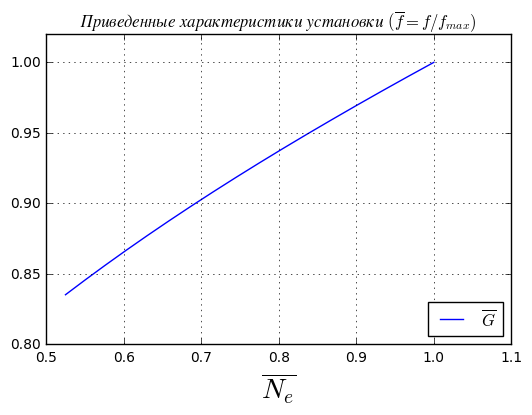

In [19]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

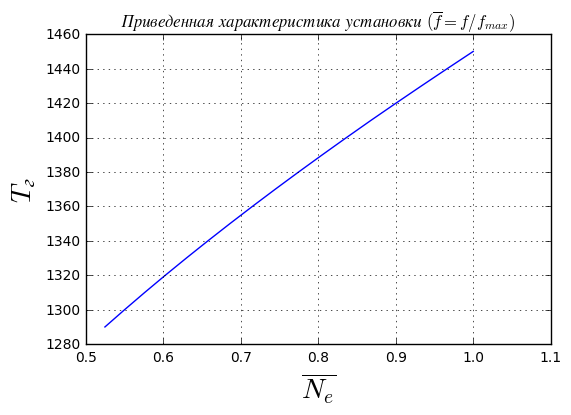

In [20]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()